In [1]:
# This is a cell to hide code snippets from displaying
# This must be at first cell!

from IPython.display import HTML

hide_me = ''
HTML('''<script>
code_show=true; 
function code_toggle() {
  if (code_show) {
    $('div.input').each(function(id) {
      el = $(this).find('.cm-variable:first');
      if (id == 0 || el.text() == 'hide_me') {
        $(this).hide();
      }
    });
    $('div.output_prompt').css('opacity', 0);
  } else {
    $('div.input').each(function(id) {
      $(this).show();
    });
    $('div.output_prompt').css('opacity', 1);
  }
  code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input style="opacity:0" type="submit" value="Click here to toggle on/off the raw code."></form>''')

interactive(children=(FloatSlider(value=300.0, description='Temp', max=300.0, min=1.0, step=1.0), Output()), _…

300 9.67 0.0258 0.000568 0.0005684557156904319


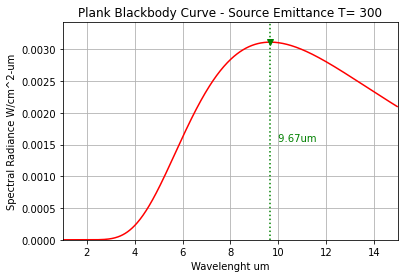

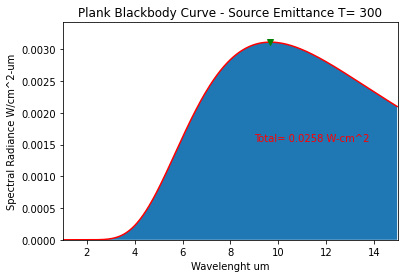

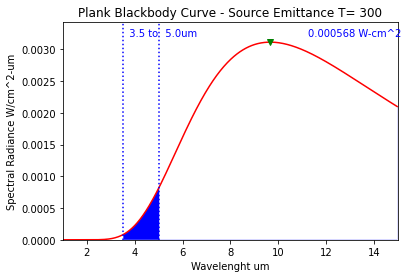

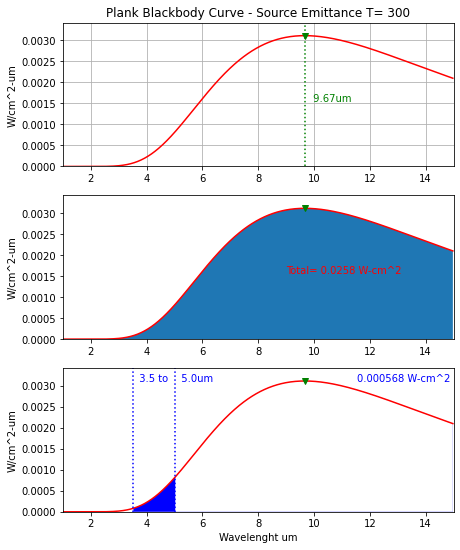

NameError: name 'pyplot' is not defined

In [3]:
from __future__ import print_function

#interactive
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#PLOT Plank Blackbody curve including subinterval
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal

Temp=300

#def f(Temp):
 #   return Temp
interact(f, Temp=widgets.FloatSlider(min=1, max=300, step=1, value=300));

#wavelenght lower limit, upper limit, and step size
lowl = 1.0
upl=15.0
step=0.025

#subband integration limits
wvl1=3.5
wvl2=5.0

#step out wavelenghts, match array size of L to wvl
wvl = np.arange(lowl, upl,step)
L = wvl*3
Lsubband = 0.0
#print (wvl, L)

#compute radiant intensity values L and sub-band total
count=0
for i in wvl:
    L[count]= 37400/(wvl[count]**5)*(1/((2.71828)**(14400/(wvl[count]*Temp))-1))
    if (wvl[count] > wvl1) and (wvl[count] < wvl2) :Lsubband+=L[count]*step
    #print (count, wvl[count], L[count])
    count +=  1
    
#find peak L and index of peak
mrx = max(L)
inpeak = np.argmax(L)

#make a vertical line
vlinex = np.repeat(wvl[inpeak], 5)
vliney = vlinex * 3
count=0
for i in vlinex:
    vliney[count] = (count/3)*L[inpeak]
    #print (count, vlinex[count], vliney[count])
    count +=1
#print (vlinex, vliney)
fullrad=sum(L)*step

fullrad_d=float("{:.2E}".format(fullrad))
Lsubbandd=float("{:.2E}".format(Lsubband))
mrxd=round(mrx,2)
wvl1d=round(wvl1,2)
wvl2d=round(wvl2,2)
wvlpd=round(wvl[inpeak],2)

print (Temp, wvlpd, fullrad_d, Lsubbandd, Lsubband)

#line plot with peak
plt.plot ( wvl, L,'r')
plt.plot (wvl[inpeak],L[inpeak],'gv')
plt.grid(True)
plt.plot (vlinex,vliney,'g:')
plt.xlabel('Wavelenght um')
plt.ylabel('Spectral Radiance W/cm^2-um')
plt.title('Plank Blackbody Curve - Source Emittance T= ' + str(Temp))
plt.axis([lowl,upl,0, 1.1*mrx])
plt.text(1.02*wvl[inpeak], 0.5*L[inpeak], " " + str(wvlpd) + "um",color='green')
plt.show()

#line plot with full fill
plt.plot ( wvl, L,'r')
plt.fill_between(wvl, 0, L)
plt.plot (wvl[inpeak],L[inpeak],'gv')
plt.xlabel('Wavelenght um')
plt.ylabel('Spectral Radiance W/cm^2-um')
plt.title('Plank Blackbody Curve - Source Emittance T= ' + str(Temp))
plt.axis([lowl,upl,0, 1.1*mrx])
plt.text(0.6*upl, 0.5*L[inpeak],"Total= " + str(fullrad_d) + " W-cm^2",color='Red')
plt.show()


#line plot with sub band fill
vlinex1 = np.repeat(wvl1, 5)
vlinex2 = np.repeat(wvl2, 5)
plt.plot ( wvl, L,'r')
plt.plot (vlinex1,vliney,'b:')
plt.plot (vlinex2,vliney,'b:')
plt.xlabel('Wavelenght um')
plt.ylabel('Spectral Radiance W/cm^2-um')
plt.title('Plank Blackbody Curve - Source Emittance T= ' + str(Temp))
plt.axis([lowl,upl,0, 1.1*mrx])
plt.text(wvl1, 1.03*L[inpeak], "  " + str(wvl1d) + " to ", color='blue')
plt.text(wvl2, 1.03*L[inpeak], "  " + str(wvl2d) +"um", color='blue')
plt.fill_between(wvl, 0, L, where = (wvl>wvl1), facecolor='blue')
plt.fill_between(wvl, 0, L, where = (wvl>wvl2), facecolor='white')
plt.plot (wvl[inpeak],L[inpeak],'gv')
plt.text(0.75*upl, 1.03*L[inpeak], str(Lsubbandd) + " W-cm^2",color='Blue')
plt.show()

#multi plot with all above
plt.figure(figsize=(7,9))

plt.subplot(311)
plt.plot ( wvl, L,'r')
plt.plot (wvl[inpeak],L[inpeak],'gv')
plt.grid(True)
plt.plot (vlinex,vliney,'g:')
#plt.xlabel('Wavelenght um')
plt.ylabel('W/cm^2-um')
plt.title('Plank Blackbody Curve - Source Emittance T= ' + str(Temp))
plt.axis([lowl,upl,0, 1.1*mrx])
plt.text(1.02*wvl[inpeak], 0.5*L[inpeak], " " + str(wvlpd) + "um",color='green')

plt.subplot(312)
plt.plot ( wvl, L,'r')
plt.fill_between(wvl, 0, L)
plt.plot (wvl[inpeak],L[inpeak],'gv')
#plt.xlabel('Wavelenght um')
plt.ylabel('W/cm^2-um')
#plt.title('Plank Blackbody Curve - Source Emittance')
plt.axis([lowl,upl,0, 1.1*mrx])
plt.text(0.6*upl, 0.5*L[inpeak],"Total= " + str(fullrad_d) + " W-cm^2",color='Red')

plt.subplot(313)
vlinex1 = np.repeat(wvl1, 5)
vlinex2 = np.repeat(wvl2, 5)
plt.plot ( wvl, L,'r')
plt.plot (vlinex1,vliney,'b:')
plt.plot (vlinex2,vliney,'b:')
plt.xlabel('Wavelenght um')
plt.ylabel('W/cm^2-um')
#plt.title('Plank Blackbody Curve - Source Emittance')
plt.axis([lowl,upl,0, 1.1*mrx])
plt.text(wvl1, L[inpeak], "  " + str(wvl1d) + " to ", color='blue')
plt.text(wvl2, L[inpeak], "  " + str(wvl2d) + "um", color='blue')
plt.fill_between(wvl, 0, L, where = (wvl>wvl1), facecolor='blue')
plt.fill_between(wvl, 0, L, where = (wvl>wvl2), facecolor='white')
plt.plot (wvl[inpeak],L[inpeak],'gv')
plt.text(0.77*upl, L[inpeak], str(Lsubbandd) + " W-cm^2",color='Blue')

plt.show()

#pyplot.show()

plt.ion()